<center> <h1 style="background-color:seagreen; color:white" > <br>Análise e Visualização dos Dados das Interrupções de Energia Elétrica nas Redes de Distribuição do ano de 2023<br></h1></center> 

<center> <h4 style="background-color:DarkKhaki; color:white" > <br>Análise <br></h4></center> 

Dados de todas as interrupções de energia elétrica ocorridas nas redes de distribuição de energia elétrica do país no ano de 2023. Não constam as interrupções ocorridas em áreas sob gestão de permissionárias de serviço público (cooperativas).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("./interrupcoes-energia-eletrica-2023.csv", sep=';', encoding='ISO-8859-1', low_memory=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9148815 entries, 0 to 9148814
Data columns (total 17 columns):
 #   Column                         Dtype 
---  ------                         ----- 
 0   DatGeracaoConjuntoDados        object
 1   DscConjuntoUnidadeConsumidora  object
 2   DscAlimentadorSubestacao       object
 3   DscSubestacaoDistribuicao      object
 4   NumOrdemInterrupcao            object
 5   DscTipoInterrupcao             object
 6   IdeMotivoInterrupcao           int64 
 7   DatInicioInterrupcao           object
 8   DatFimInterrupcao              object
 9   DscFatoGeradorInterrupcao      object
 10  NumNivelTensao                 int64 
 11  NumUnidadeConsumidora          int64 
 12  NumConsumidorConjunto          int64 
 13  NumAno                         int64 
 14  NomAgenteRegulado              object
 15  SigAgente                      object
 16  NumCPFCNPJ                     int64 
dtypes: int64(6), object(11)
memory usage: 1.2+ GB


In [4]:
df.head()

,DatGeracaoConjuntoDados,DscConjuntoUnidadeConsumidora,DscAlimentadorSubestacao,DscSubestacaoDistribuicao,NumOrdemInterrupcao,DscTipoInterrupcao,IdeMotivoInterrupcao,DatInicioInterrupcao,DatFimInterrupcao,DscFatoGeradorInterrupcao,NumNivelTensao,NumUnidadeConsumidora,NumConsumidorConjunto,NumAno,NomAgenteRegulado,SigAgente,NumCPFCNPJ
0,2024-02-10,São Francisco,01C2,SFR,2023-1,Não Programada,0,2023-01-01 00:16:34,2023-01-01 02:25:00,INTERNA - NAO PROGRAMADA - TERCEIROS - INTERFE...,13800,1,51157,2023,ENERGISA ACRE - DISTRIBUIDORA DE ENERGIA S.A,ELETROACRE,4065033000170
1,2024-02-10,TAQUARI,01C7,TAQ,2023-1,Não Programada,0,2023-01-01 00:16:34,2023-01-01 02:25:00,INTERNA - NAO PROGRAMADA - TERCEIROS - INTERFE...,13800,1,49861,2023,ENERGISA ACRE - DISTRIBUIDORA DE ENERGIA S.A,ELETROACRE,4065033000170
2,2024-02-10,São Francisco,01I2,SFR,2023-1,Não Programada,0,2023-01-01 00:16:34,2023-01-01 02:25:00,INTERNA - NAO PROGRAMADA - TERCEIROS - INTERFE...,13800,1,51157,2023,ENERGISA ACRE - DISTRIBUIDORA DE ENERGIA S.A,ELETROACRE,4065033000170
3,2024-02-10,Tangará,01I8,TAN,2023-1,Não Programada,0,2023-01-01 00:16:34,2023-01-01 01:57:58,INTERNA - NAO PROGRAMADA - TERCEIROS - INTERFE...,13800,1,71279,2023,ENERGISA ACRE - DISTRIBUIDORA DE ENERGIA S.A,ELETROACRE,4065033000170
4,2024-02-10,Tangará,01C1,TRA,2023-1,Não Programada,0,2023-01-01 00:16:34,2023-01-01 01:57:58,INTERNA - NAO PROGRAMADA - TERCEIROS - INTERFE...,13800,1,71279,2023,ENERGISA ACRE - DISTRIBUIDORA DE ENERGIA S.A,ELETROACRE,4065033000170


In [25]:
df["DatInicioInterrupcao"] = pd.to_datetime(df["DatInicioInterrupcao"])
df["DatFimInterrupcao"] = pd.to_datetime(df["DatFimInterrupcao"])
df.head(3)

,DatGeracaoConjuntoDados,DscConjuntoUnidadeConsumidora,DscAlimentadorSubestacao,DscSubestacaoDistribuicao,NumOrdemInterrupcao,DscTipoInterrupcao,IdeMotivoInterrupcao,DatInicioInterrupcao,DatFimInterrupcao,DscFatoGeradorInterrupcao,NumNivelTensao,NumUnidadeConsumidora,NumConsumidorConjunto,NumAno,NomAgenteRegulado,SigAgente,NumCPFCNPJ
0,2024-02-10,São Francisco,01C2,SFR,2023-1,Não Programada,0,2023-01-01 00:16:34,2023-01-01 02:25:00,INTERNA - NAO PROGRAMADA - TERCEIROS - INTERFE...,13800,1,51157,2023,ENERGISA ACRE - DISTRIBUIDORA DE ENERGIA S.A,ELETROACRE,4065033000170
1,2024-02-10,TAQUARI,01C7,TAQ,2023-1,Não Programada,0,2023-01-01 00:16:34,2023-01-01 02:25:00,INTERNA - NAO PROGRAMADA - TERCEIROS - INTERFE...,13800,1,49861,2023,ENERGISA ACRE - DISTRIBUIDORA DE ENERGIA S.A,ELETROACRE,4065033000170
2,2024-02-10,São Francisco,01I2,SFR,2023-1,Não Programada,0,2023-01-01 00:16:34,2023-01-01 02:25:00,INTERNA - NAO PROGRAMADA - TERCEIROS - INTERFE...,13800,1,51157,2023,ENERGISA ACRE - DISTRIBUIDORA DE ENERGIA S.A,ELETROACRE,4065033000170


In [49]:
df["duracao"] = df["DatFimInterrupcao"] - df["DatInicioInterrupcao"]
df["duracao"].head(2)

0   0 days 02:08:26
1   0 days 02:08:26
Name: duracao, dtype: timedelta64[ns]

In [5]:
df["NomAgenteRegulado"].unique()

array(['ENERGISA ACRE - DISTRIBUIDORA DE ENERGIA S.A',
       'COMPANHIA DE ELETRICIDADE DO AMAPÁ',
       'ENERGISA TOCANTINS DISTRIBUIDORA DE ENERGIA S.A.',
       'EQUATORIAL MARANHÃO DISTRIBUIDORA DE ENERGIA S.A',
       'EQUATORIAL PIAUÍ DISTRIBUIDORA DE ENERGIA S.A',
       'COMPANHIA ENERGÉTICA DO CEARÁ',
       'COMPANHIA ENERGÉTICA DO RIO GRANDE DO NORTE COSERN',
       'COMPANHIA ENERGÉTICA DE PERNAMBUCO',
       'EQUATORIAL ALAGOAS DISTRIBUIDORA DE ENERGIA S.A.',
       'COMPANHIA SUL SERGIPANA DE ELETRICIDADE',
       'COMPANHIA DE ELETRICIDADE DO ESTADO DA BAHIA COELBA',
       'DME DISTRIBUIÇÃO S.A. - DMED',
       'COMPANHIA PAULISTA DE FORÇA E LUZ',
       'COMPANHIA JAGUARI DE ENERGIA',
       'COMPANHIA CAMPOLARGUENSE DE ENERGIA COCEL',
       'FORÇA E LUZ CORONEL VIVIDA LTDA',
       'EMPRESA FORÇA E LUZ DE URUSSANGA LTDA',
       'DCELT - DISTRIBUIDORA CATARINENSE DE ENERGIA ELÉTRICA LTDA',
       'EMPRESA FORÇA E LUZ JOÃO CESA LTDA',
       'Departamento Municipal 

In [13]:
df["NomAgenteRegulado"].nunique()

53

In [6]:
df["DscConjuntoUnidadeConsumidora"].nunique()

2954

In [7]:
df_equatorial_para = df[df["NomAgenteRegulado"]== 'EQUATORIAL PARÁ DISTRIBUIDORA DE ENERGIA S.A.']
df_equatorial_para

,DatGeracaoConjuntoDados,DscConjuntoUnidadeConsumidora,DscAlimentadorSubestacao,DscSubestacaoDistribuicao,NumOrdemInterrupcao,DscTipoInterrupcao,IdeMotivoInterrupcao,DatInicioInterrupcao,DatFimInterrupcao,DscFatoGeradorInterrupcao,NumNivelTensao,NumUnidadeConsumidora,NumConsumidorConjunto,NumAno,NomAgenteRegulado,SigAgente,NumCPFCNPJ
2556895,2024-02-10,MOSQUEIRO,01M4,MOS,2023-1-3-16198054,Não Programada,0,2023-01-01 00:00:34,2023-01-01 08:12:37,INTERNA;NAO PROGRAMADA;PROPRIAS DO SISTEMA;FAL...,380,1,28110,2023,EQUATORIAL PARÁ DISTRIBUIDORA DE ENERGIA S.A.,Equatorial PA,4895728000180
2556896,2024-02-10,TERRA ALTA,CC-03,CUC,2023-1-86279-16197866,Não Programada,0,2023-01-01 00:06:50,2023-01-01 03:51:59,INTERNA;NAO PROGRAMADA;MEIO AMBIENTE;ARVORE OU...,13800,359,68622,2023,EQUATORIAL PARÁ DISTRIBUIDORA DE ENERGIA S.A.,Equatorial PA,4895728000180
2556897,2024-02-10,PARAGOMINAS II,PR-15,PAR,2023-1-1-16198052,Não Programada,0,2023-01-01 00:12:59,2023-01-01 01:28:53,INTERNA;NAO PROGRAMADA;PROPRIAS DO SISTEMA;FAL...,380,101,10180,2023,EQUATORIAL PARÁ DISTRIBUIDORA DE ENERGIA S.A.,Equatorial PA,4895728000180
2556898,2024-02-10,ABAETETUBA II,AB-15,ABA,2023-1-59-16198110,Não Programada,0,2023-01-01 00:21:42,2023-01-01 03:41:58,INTERNA;NAO PROGRAMADA;PROPRIAS DO SISTEMA;SOB...,13800,565,27313,2023,EQUATORIAL PARÁ DISTRIBUIDORA DE ENERGIA S.A.,Equatorial PA,4895728000180
2556899,2024-02-10,MOSQUEIRO,01M5,MOS,2023-1-11-16198062,Não Programada,0,2023-01-01 00:27:14,2023-01-01 02:11:18,INTERNA;NAO PROGRAMADA;PROPRIAS DO SISTEMA;FAL...,380,1,28110,2023,EQUATORIAL PARÁ DISTRIBUIDORA DE ENERGIA S.A.,Equatorial PA,4895728000180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2921883,2024-02-10,UTINGA,UN-07,UTN,2023-12-112329-17386123,Não Programada,0,2023-12-31 23:37:43,2024-01-01 12:34:00,INTERNA;NAO PROGRAMADA;PROPRIAS DO SISTEMA;FAL...,380,1,97995,2023,EQUATORIAL PARÁ DISTRIBUIDORA DE ENERGIA S.A.,Equatorial PA,4895728000180
2921884,2024-02-10,MOSQUEIRO,01M5,MOS,2023-12-112335-17386129,Não Programada,6,2023-12-31 23:40:27,2024-01-01 23:38:00,INTERNA;NAO PROGRAMADA;PROPRIAS DO SISTEMA;FAL...,380,1,28674,2023,EQUATORIAL PARÁ DISTRIBUIDORA DE ENERGIA S.A.,Equatorial PA,4895728000180
2921885,2024-02-10,BRAGANÇA,BA-05,BRA,2023-12-112352-17386146,Não Programada,0,2023-12-31 23:41:56,2024-01-02 01:08:00,INTERNA;NAO PROGRAMADA;PROPRIAS DO SISTEMA;FAL...,380,17,74115,2023,EQUATORIAL PARÁ DISTRIBUIDORA DE ENERGIA S.A.,Equatorial PA,4895728000180
2921886,2024-02-10,ABAETETUBA II,MO-03,MOC,2023-12-112355-17386149,Não Programada,0,2023-12-31 23:45:40,2024-01-01 18:52:50,INTERNA;NAO PROGRAMADA;TERCEIROS;INTERFERENCIA...,380,1,23032,2023,EQUATORIAL PARÁ DISTRIBUIDORA DE ENERGIA S.A.,Equatorial PA,4895728000180


In [8]:
df_equatorial_para["DscConjuntoUnidadeConsumidora"].unique()

array(['MOSQUEIRO', 'TERRA ALTA', 'PARAGOMINAS II', 'ABAETETUBA II',
       'JURUNAS', 'PARAGOMINAS I', 'TUCUMÃ I', 'VILA DO CONDE', 'REDUTO',
       'BRAGANÇA', 'NOVA PARAUAPEBAS', 'ORIXIMINÁ', 'JURUTÍ II',
       'COTIJUBA', 'SANTARÉM', 'ITACAIUNAS', 'GOIANÉSIA II',
       'SALINÓPOLIS', 'CACHOEIRA DO ARARÍ', 'MEDICILÂNDIA', 'PEDREIRA',
       'ALTAMIRA II', 'CIDADE MODELO', 'AFUÁ', 'UTINGA', 'SANTO ANTÔNIO',
       'CONCEIÇÃO DO ARAGUAIA', 'PARAGOMINAS III', 'DOM ELISEU',
       'CURRALINHO', 'PORTO DE MOZ', 'ALTAMIRA III', 'AUGUSTO MONTENEGRO',
       'ALENQUER I', 'REDENÇÃO III', 'MONTE DOURADO - JARI', 'JACUNDÁ I',
       'SANTA MARIA DO PARÁ', 'SÃO SEBASTIÃO DA BOA VISTA', 'ÓBIDOS I',
       'CAMETÁ I', 'MARITUBA II', 'COQUEIRO', 'SÃO MIGUEL DO GUAM',
       'ANANINDEUA', 'CIDADE NOVA', 'NOVO PROGRESSO II', 'ALMEIRIM',
       'ITAITUBA II', 'PONTA DE PEDRAS', 'CREMAÇÃO', 'TOMÉ-AÇÚ',
       'BELTERRA', 'CAPANEMA I', 'CAMETÁ II', 'URUARÁ', 'BENGUÍ',
       'TAILÂNDIA III', 'MOJÚ',

In [9]:
df_equatorial_para[df_equatorial_para["DscConjuntoUnidadeConsumidora"]=="TUCURUÍ I"]["NumNivelTensao"].unique()

array([  380, 13800, 69000, 34500])

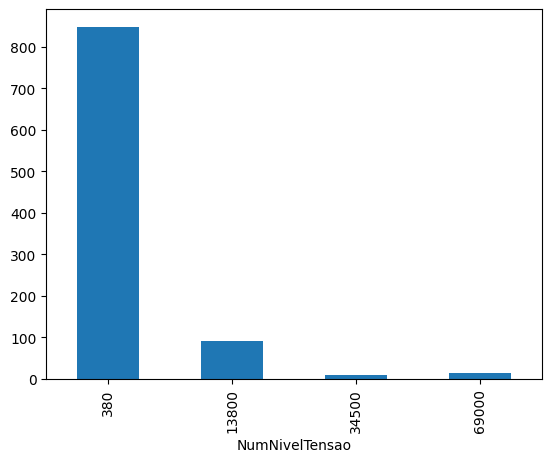

In [10]:
df_equatorial_para[df_equatorial_para["DscConjuntoUnidadeConsumidora"]=="TUCURUÍ I"].groupby(
                            "NumNivelTensao").count()['SigAgente'].plot(kind="bar")
plt.show()

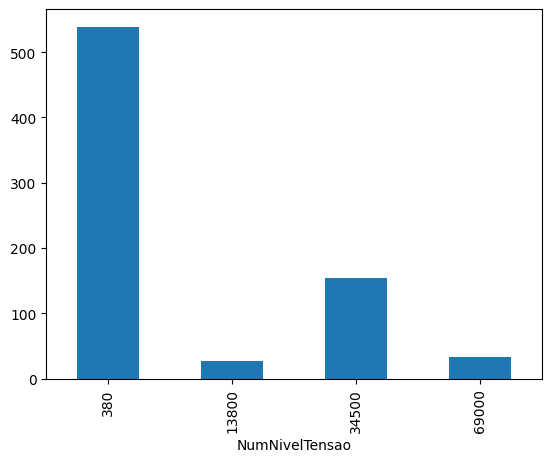

In [11]:
df_equatorial_para[df_equatorial_para["DscConjuntoUnidadeConsumidora"]=="TUCURUÍ II"].groupby(
                            "NumNivelTensao").count()['SigAgente'].plot(kind="bar")
plt.show()

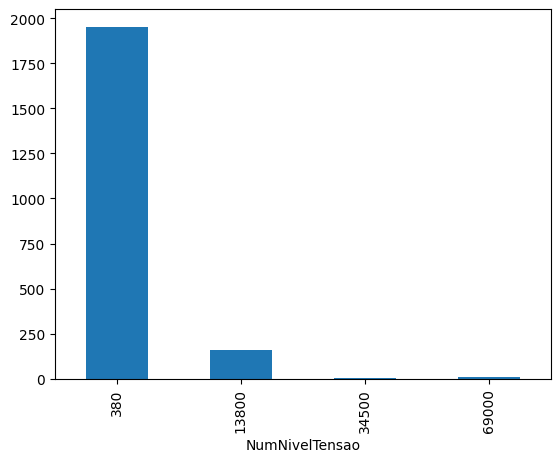

In [12]:
df_equatorial_para[df_equatorial_para["DscConjuntoUnidadeConsumidora"]=="TUCURUÍ CENTRO"].groupby(
                            "NumNivelTensao").count()['SigAgente'].plot(kind="bar")
plt.show()